# CDS503: Machine Learning

***
## LAB 1: Supplementary Materials 

### Part 3: Data Cleaning & Cleansing

In [1]:
#Import Library Pandas
import pandas as pd
# import library for number processing in Python
import numpy as np

df = pd.read_csv('input/Emp.csv')

# Alternatively, we can drop all rows with the NaN value
df.dropna()

# Alternatively, we can drop rows with at least one NaN value
#df.dropna(axis='columns')

# Drop the rows where all elements are missing.
#df.dropna(how='all')

# Keep only the rows with at least 2 non-NA values.
#df.dropna(thresh=2)

# Define in which columns to look for missing values.
#df.dropna(subset=['comm'])

# Keep the DataFrame with valid entries in the same variable.
#df.dropna(inplace=True)
#df

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7369,SMITH,CLERK,7902.0,13/6/1993,800,0.0,20
1,7499,ALLEN,SALESMAN,7698.0,15/8/1998,1600,300.0,30
2,7521,WARD,SALESMAN,7698.0,26/3/1996,1250,500.0,30
8,7844,TURNER,SALESMAN,7698.0,4/6/1995,1500,0.0,30
13,7654,MARTIN,SALESMAN,7698.0,5/12/1998,1250,1400.0,30


***
### Part 4: Attributes Filters

In [2]:
#Import Library Pandas
import pandas as pd

df = pd.read_csv('input/Emp.csv')

df

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7369,SMITH,CLERK,7902.0,13/6/1993,800,0.0,20
1,7499,ALLEN,SALESMAN,7698.0,15/8/1998,1600,300.0,30
2,7521,WARD,SALESMAN,7698.0,26/3/1996,1250,500.0,30
3,7566,JONES,MANAGER,7839.0,31/10/1995,2975,NaN,20
4,7698,BLAKE,MANAGER,7839.0,11/6/1992,2850,NaN,30
5,7782,CLARK,MANAGER,7839.0,14/5/1993,2450,NaN,10
6,7788,SCOTT,ANALYST,7566.0,5/3/1996,3000,NaN,20
7,7839,KING,PRESIDENT,NaN,9/6/1990,5000,0.0,10
8,7844,TURNER,SALESMAN,7698.0,4/6/1995,1500,0.0,30
9,7876,ADAMS,CLERK,7788.0,4/6/1999,1100,NaN,20


In [3]:
# select columns by regular expression
df.filter(regex='e$', axis=1)

,ename,hiredate
0,SMITH,13/6/1993
1,ALLEN,15/8/1998
2,WARD,26/3/1996
3,JONES,31/10/1995
4,BLAKE,11/6/1992
5,CLARK,14/5/1993
6,SCOTT,5/3/1996
7,KING,9/6/1990
8,TURNER,4/6/1995
9,ADAMS,4/6/1999


We can also do **grouping** of the data based on specific column:

In [4]:
# import library to display multiple outputs
from IPython.display import display

# group data by salary based on department number
df1 = df.groupby(["deptno"])[['sal']].count()

# group data by salary based on department number
df2 = df.groupby(["deptno"])[['job']].count()

display(df1)
display(df2)

,sal
deptno,
10,3
20,5
30,6


,job
deptno,
10,3
20,5
30,6


Further reading can be done here: 
-  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.filter.html
-  https://pythonspot.com/pandas-filter/
-  https://pythonspot.com/pandas-groupby/

#### Disretize a Continuous Values

Some of the column may need to disretize to represent a much more direct and meaningful values. Although this may *not be required* and some may debate that it does remove *valuable* information, we may still need to do it to simplify the values by mapping them to manageable number. 

This can be done by manually define the labels (or bins) of the data. Let say instead of *actual* salary value, we replace them with a *discrete bins* to protect privacy while being transparent at the same time.

In [5]:
#Import Library Pandas
import pandas as pd

df = pd.read_csv('input/Emp.csv')

# define your bins of values
# Very_Low < Low < Medium < High 
bins = [0, 500, 1000, 3000, 99999]

# define your label for each range of values
# must be less than the number of bin values
labels = ['Very_Low', 'Low', 'Medium', 'High']

df.sal

0      800
1     1600
2     1250
3     2975
4     2850
5     2450
6     3000
7     5000
8     1500
9     1100
10     950
11    1300
12    3000
13    1250
Name: sal, dtype: int64

In [6]:
# replace and put the bin label to discretize the values of the data
df['sal'] = pd.cut(df.sal, bins=bins, labels=labels)

df

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7369,SMITH,CLERK,7902.0,13/6/1993,Low,0.0,20
1,7499,ALLEN,SALESMAN,7698.0,15/8/1998,Medium,300.0,30
2,7521,WARD,SALESMAN,7698.0,26/3/1996,Medium,500.0,30
3,7566,JONES,MANAGER,7839.0,31/10/1995,Medium,NaN,20
4,7698,BLAKE,MANAGER,7839.0,11/6/1992,Medium,NaN,30
5,7782,CLARK,MANAGER,7839.0,14/5/1993,Medium,NaN,10
6,7788,SCOTT,ANALYST,7566.0,5/3/1996,Medium,NaN,20
7,7839,KING,PRESIDENT,NaN,9/6/1990,High,0.0,10
8,7844,TURNER,SALESMAN,7698.0,4/6/1995,Medium,0.0,30
9,7876,ADAMS,CLERK,7788.0,4/6/1999,Medium,NaN,20


Alternatively, you can make **Python** *decide* what range to *bin* the column values based on value and length of the available data input *automatically* using `qcut` method instead.

In [7]:
#Import Library Pandas
import pandas as pd

df = pd.read_csv('input/Emp.csv')

# define your label for each range of values
# must be less than the number of bin values
labels = ['Very_Low', 'Low', 'Medium', 'High']

df['sal'] = pd.qcut(df.sal, 4, labels=labels)

df

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7369,SMITH,CLERK,7902.0,13/6/1993,Very_Low,0.0,20
1,7499,ALLEN,SALESMAN,7698.0,15/8/1998,Medium,300.0,30
2,7521,WARD,SALESMAN,7698.0,26/3/1996,Very_Low,500.0,30
3,7566,JONES,MANAGER,7839.0,31/10/1995,High,NaN,20
4,7698,BLAKE,MANAGER,7839.0,11/6/1992,Medium,NaN,30
5,7782,CLARK,MANAGER,7839.0,14/5/1993,Medium,NaN,10
6,7788,SCOTT,ANALYST,7566.0,5/3/1996,High,NaN,20
7,7839,KING,PRESIDENT,NaN,9/6/1990,High,0.0,10
8,7844,TURNER,SALESMAN,7698.0,4/6/1995,Low,0.0,30
9,7876,ADAMS,CLERK,7788.0,4/6/1999,Very_Low,NaN,20


Further reading on this matter, check this links:
-  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.cut.html
-  https://pandas.pydata.org/pandas-docs/stable/generated/pandas.qcut.html#pandas.qcut

### Part 5: Visualization Using Plots

If lets say we plot a bar chart for the salary against job columns, then the plot can be done directly using `pandas` library. Note that we *only* explore the basic plotting here, while other advanced plots using other libraries can be found in the link at the end of this part.

<AxesSubplot:xlabel='Job Name', ylabel='Salary'>

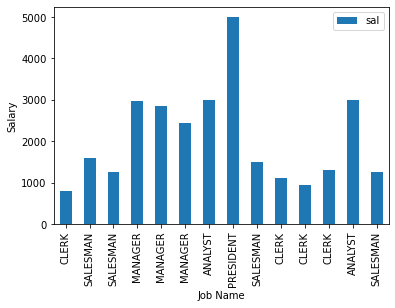

In [8]:
#Import Library Pandas
import pandas as pd

df = pd.read_csv('input/Emp.csv')

# Plot basic bar chart
# x is the column for x-axis
# y is the column for y-axis
# rot is the rotation of the labels/values
ax = df.plot.bar(x='job', y='sal', rot=90)

# Put label axis
ax.set_ylabel('Salary')
ax.set_xlabel('Job Name')

ax

Seems weird right? Since the chart only count based on row-wise, thus allowing *duplicates* of the columns "job". To address this, we need to group the value first then plot again.

Text(0.5, 0, 'Job Name')

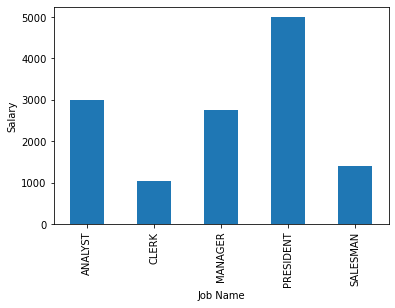

In [9]:
ax = df.groupby("job")['sal'].mean().plot(kind='bar')

# Put label axis
ax.set_ylabel('Salary')
ax.set_xlabel('Job Name')

When `pandas` plots, it assumes every single data point should be connected. In other word, `pandas` has no idea that we don’t want other columns except "job" and "salary" columns. In order to fix that, we just need to add in a `groupby`. Once we’ve grouped the data together by "deptno", `pandas` plot each group separately.

deptno
10    AxesSubplot(0.125,0.125;0.775x0.755)
20    AxesSubplot(0.125,0.125;0.775x0.755)
30    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

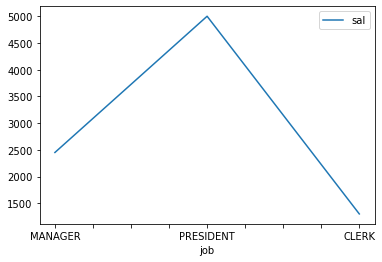

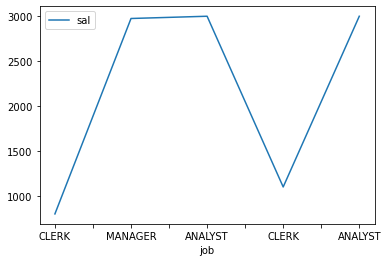

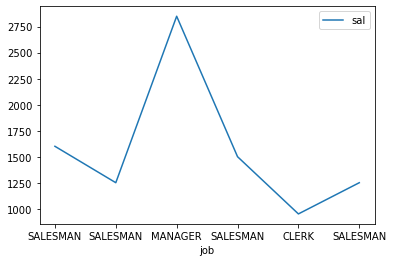

In [10]:
# Group by dept. number of the job and salary
df.groupby('deptno').plot(x='job', y='sal')

Well maybe that was a little too separately! 

The basic idea is first we need to create a graph, and then we’ll tell `pandas` to keep drawing on top of the same graph for every single chart.

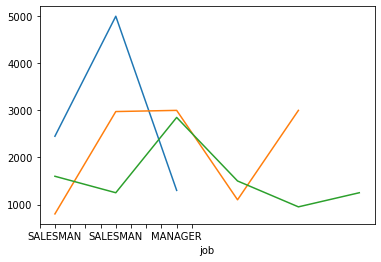

In [11]:
# import matplotlib library
import matplotlib.pyplot as plt

# add them as subplots and draw on top of each other
fig, ax = plt.subplots()
axes = df.groupby('deptno').plot(x='job', y='sal', ax=ax, legend=False)

While these codes provide visualization needed to understand the pattern presented in a data, we still need to label them sometimes to provide good visualization on what part of the data that are visualized while assist comprehension.

However, the `pandas` library do not provide this options, which requires other libraries to support and acheive this. For that, we leave the "creativity" part of visualizing to you.

Further plots and subplotting guides are available using `matplotlib` and `seaborn` here:
-  http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/
-  https://tomaugspurger.github.io/modern-6-visualization.html
-  https://datasciencelab.wordpress.com/2013/12/21/beautiful-plots-with-pandas-and-matplotlib/
-  https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html
-  https://plot.ly/matplotlib/subplots/